In [2]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo

# Combined operations
## Morphological thinning and thickening 
by iterating the Hit-or-Miss transform and remove detected pixels from $X$.

* thinning

$$ X \oslash B = X \; | \;(X \otimes B)$$

* thickening

$$ X \odot B = X \cup (X \otimes B)$$

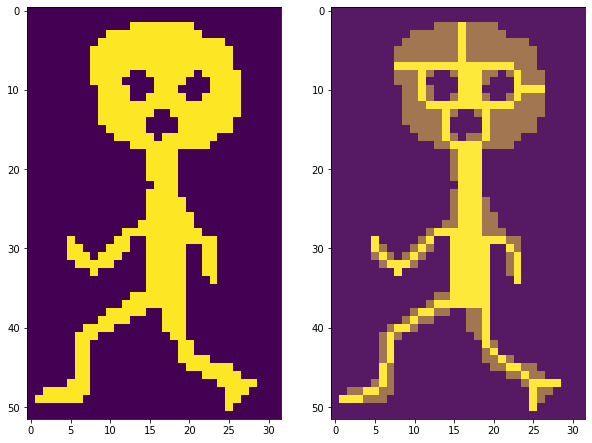

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.morphology import erosion

def hit_or_miss(X,B12):
    B1 = B12 == 1
    B2 = B12 == 0
    r = np.logical_and(erosion(X,B1),erosion(1-X,B2))
    return r

def rotate_4(B):
    #returns structuring element oriented in 4 directions
    return [B,np.rot90(B),np.rot90(np.rot90(B)),np.rot90(np.rot90(np.rot90(B)))]

X = (imread('http://homepages.ulb.ac.be/~odebeir/data/man.tif')>0)[:,:,0].astype(np.uint8)

B = np.array([[2,1,2],[0,1,1],[0,0,2]]) # . are coded with 2

#iterate on the four structuring element

selem = rotate_4(B)

R = X.copy()

for i in range(10):
    for s in selem:
        HoM = hit_or_miss(R,s)  
        R[HoM] = 0

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(X,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X,interpolation='nearest',alpha = .8)
plt.imshow(R,interpolation='nearest',alpha=.5);



### skeleton extraction

A special case of thinning is the skeleton extraction, by applying the thickening for these two set of structuring elements, one can reduce every $X$ to single line structures sharing the same topology.

$$
\begin{matrix}
  0 & 0    & 0 \\
  \cdot     & 1    & \cdot \\
  1     & 1    & 1
 \end{matrix}
 $$
 
 and
 
 $$
\begin{matrix}
  \cdot & 0    & 0 \\
  1     & 1    & 0 \\
  \cdot     & 1    & \cdot
 \end{matrix}
 $$
 

and there 3 other orientations.

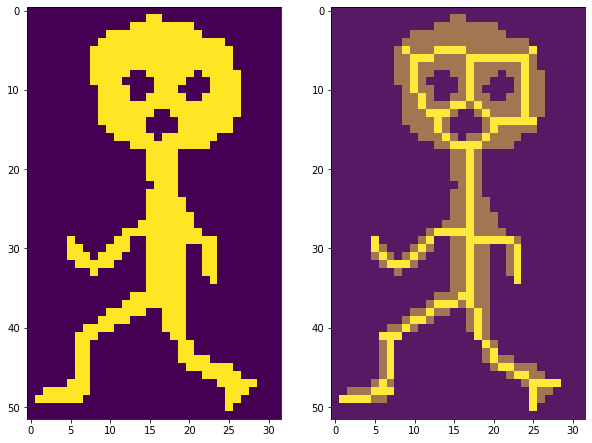

In [4]:
# skeletoninzing structuring elements
B1 = np.array([[0,0,0],[2,1,2],[1,1,1]])
B2 = np.array([[2,0,0],[1,1,0],[2,1,2]])
selem = rotate_4(B1) + rotate_4(B2) #join the two list of structuring element

X[1,15:17] = 1

R = X.copy()

for i in range(4):
    for s in selem:
        HoM = hit_or_miss(R,s)  
        R[HoM] = 0

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(X,interpolation='nearest')
plt.subplot(1,2,2)
plt.imshow(X,interpolation='nearest',alpha = .8)
plt.imshow(R,interpolation='nearest',alpha=.5);


an application of the skeleton extraction is found in the pre-processing of fingerprints where we are looking for specific *minutiae*

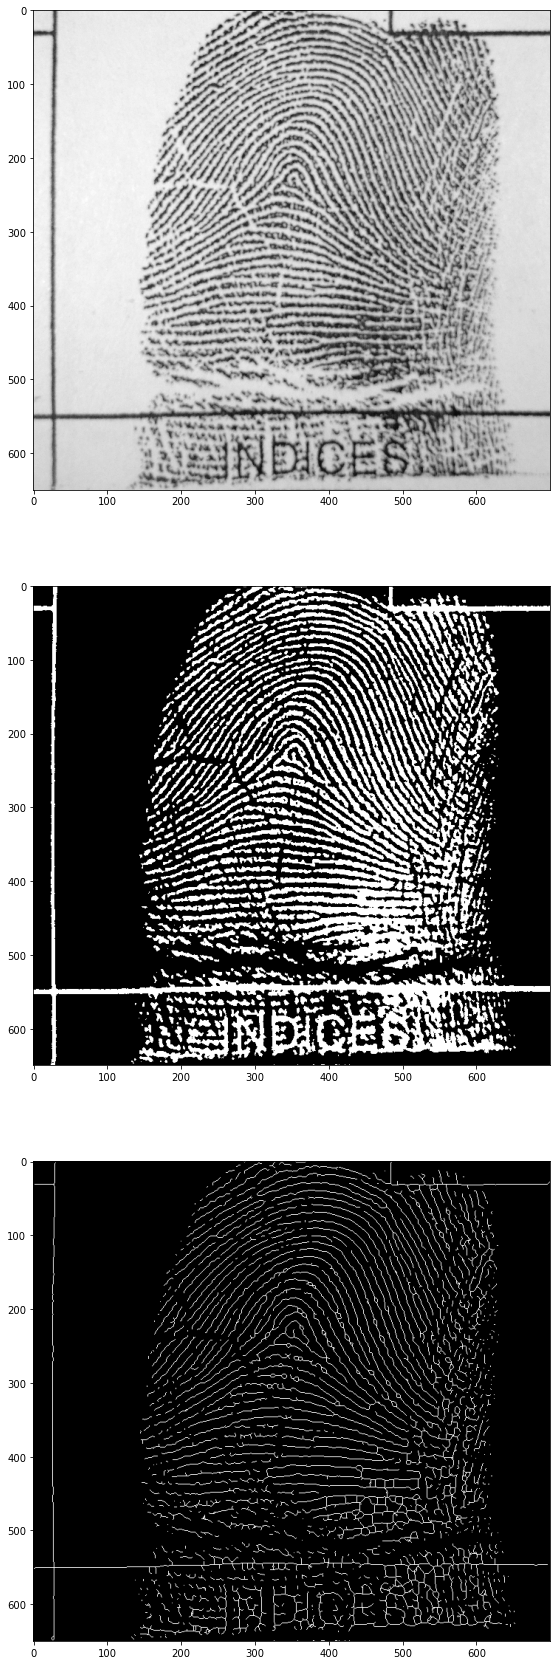

In [5]:
from skimage.filters import threshold_otsu
from skimage.morphology import skeletonize

sub = 4
im = imread('../data/Arch_in_the_right_index_fingerprint_of_a_woman.JPG')[1400:4000:sub,100:2900:sub,0]
th_otsu = threshold_otsu(im)

R = (im<th_otsu).copy()

skeleton = skeletonize(R)

plt.figure(figsize=[30,30])
plt.subplot(3,1,1)
plt.imshow(im,cmap=plt.cm.gray);

plt.subplot(3,1,2)
plt.imshow(R,cmap=plt.cm.gray);

plt.subplot(3,1,3)
plt.imshow(skeleton,cmap=plt.cm.gray);

[image source](https://commons.wikimedia.org/wiki/File:Arch_in_the_right_index_fingerprint_of_a_woman.JPG)

>see also:
* Morphological algorithms [DIPM](../00-Preface/06-References.ipynb#[DIPM]) pp143-166

### Pruning

The skeleton, or other morphological processing can produce unwanted small artifacts, these irragularities can often be removed used by a process called pruning. 

Pruning is a specific thinning algorithm using the following structuring element (and ther rotations):

$$
\begin{matrix}
  0 & 0    & 0 \\
  0     & 1    & 0 \\
  0     & \cdot    & \cdot
 \end{matrix}
 $$
 
 and
 
 $$
\begin{matrix}
  0 & 0    & 0 \\
  0     & 1    & 0 \\
  \cdot     & \cdot    & 0
 \end{matrix}
 $$
 
 and there 3 other orientations,
 example of a pruning applied iteratively on a binary skeleton:

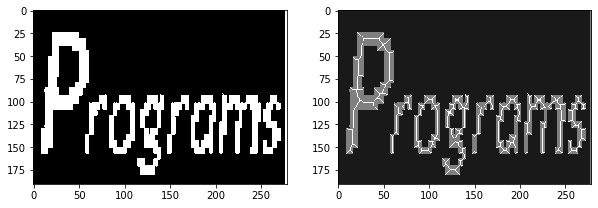

In [6]:
ima = imread('http://homepages.ulb.ac.be/~odebeir/data/programs.png')[:,:,0] >10

# skeletoninzing structuring elements
B1 = np.array([[0,0,0],[2,1,2],[1,1,1]])
B2 = np.array([[2,0,0],[1,1,0],[2,1,2]])
selem = rotate_4(B1) + rotate_4(B2) #join the two list of structuring element

R = ima.copy()

for i in range(12):
    for s in selem:
        HoM = hit_or_miss(R,s)  
        R[HoM] = 0

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(ima,interpolation='nearest',cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.imshow(ima,interpolation='nearest',alpha = .8,cmap=plt.cm.gray)
plt.imshow(R,interpolation='nearest',alpha=.5,cmap=plt.cm.gray);


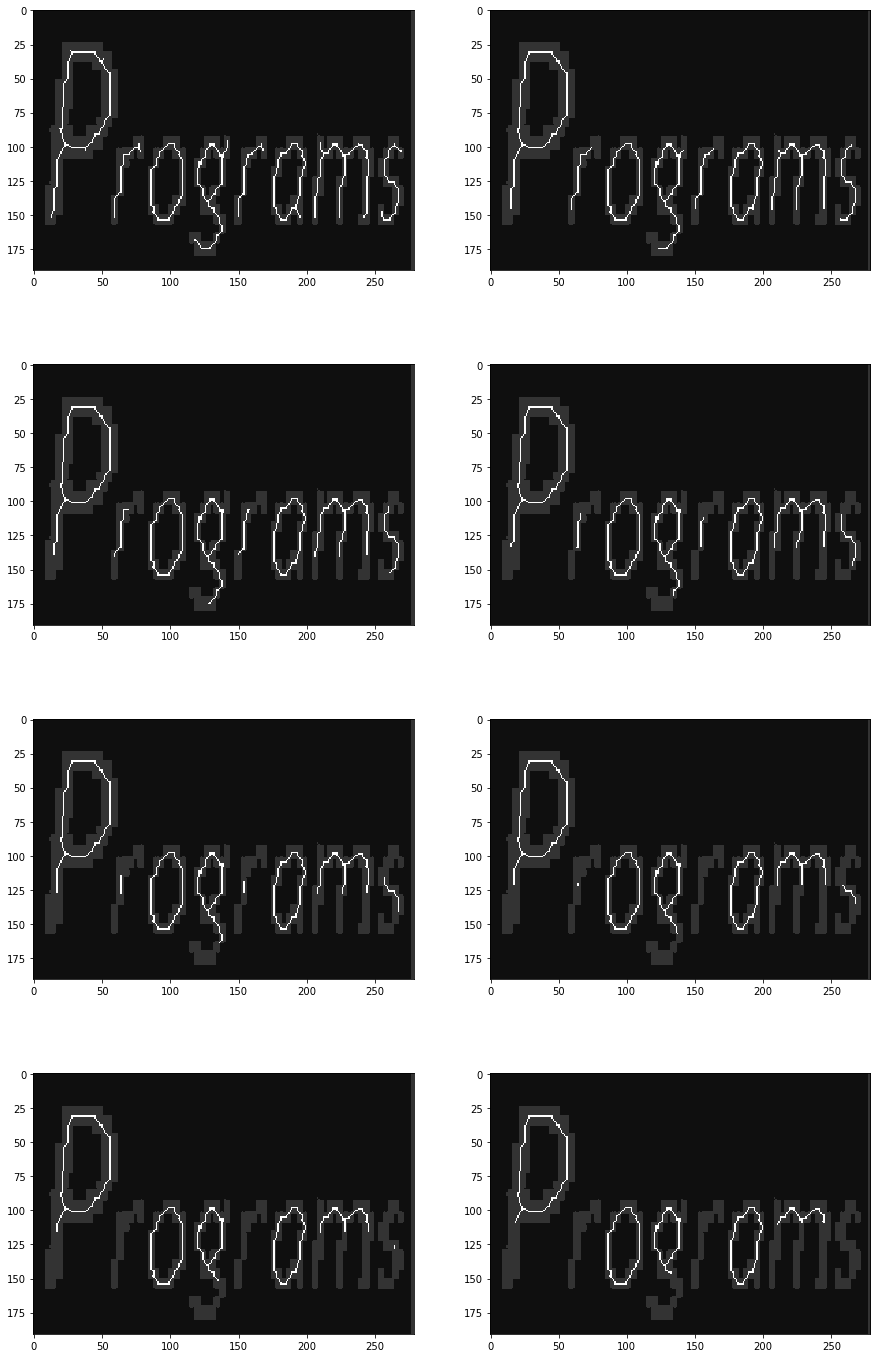

In [7]:
# pruning structuring elements
B1 = np.array([[0,0,0],[0,1,0],[0,2,2]])
B2 = np.array([[0,0,0],[0,1,0],[2,2,0]])
selem = rotate_4(B1) + rotate_4(B2) #join the two list of structuring element

plt.figure(figsize=[15,25])

k = 1
for i in range(24):
    for s in selem:
        HoM = hit_or_miss(R,s)  
        R[HoM] = 0

    if k%3 == 0:
        plt.subplot(4,2,int(k/3))
        plt.imshow(ima,interpolation='nearest',alpha = .7,cmap=plt.cm.gray)
        plt.imshow(R.copy(),interpolation='nearest',alpha=.8,cmap=plt.cm.gray);
    k += 1



## Distance Map 
*Start from a binary image, and for each binary image, will compute the distance to the background.*

The distance function $dist_X$ associate to a set $X$, the distance for each point of $X$ to the background

$$ dist_X(p) = min\{n \in \mathbb \; | \; p \notin X \ominus nB \}$$

explicit distance map (brute force) computing can be computer intensive, therefore other appriximated distance are proposed

* the city-block distance

$$
\begin{matrix}
 & 1    &  \\
1     & 0    & 1 \\
 & 1    &  \\
 \end{matrix}
 $$

* the chess-board distance

$$
\begin{matrix}
1 & 1  & 1 \\
1     & 0    & 1 \\
1 & 1  & 1 \\
 \end{matrix}
 $$

* the chamfer distance

$$
\begin{matrix}
4 & 3  & 4 \\
3     & 0    & 3 \\
4 & 3  & 4 \\
 \end{matrix}
 $$


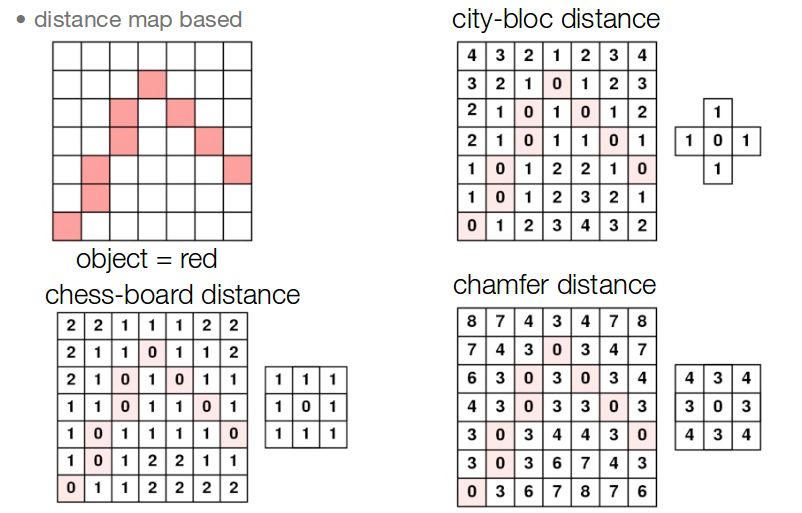

In [8]:
Image('../data/distances.png')

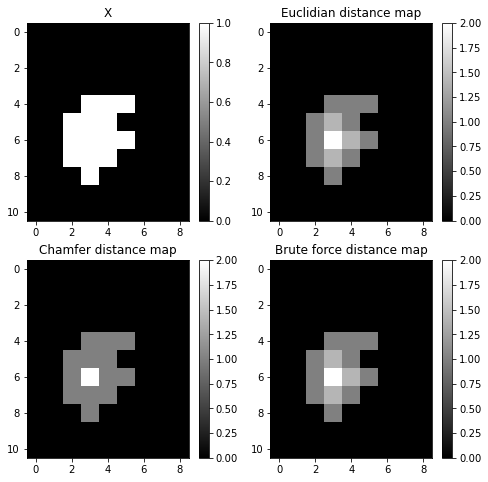

In [9]:
from scipy.ndimage import distance_transform_cdt,distance_transform_edt,distance_transform_bf
import matplotlib.pyplot as plt
import numpy as np

X = np.asarray([[0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,1,1,1,0,0,0,0],
                [0,0,1,1,1,1,0,0,0],
                [0,0,1,1,1,0,0,0,0],
                [0,0,0,1,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0]])

dist_X = distance_transform_edt(X)
dist_bf = distance_transform_bf(X)
dist_c = distance_transform_cdt(X)

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(X,interpolation='nearest',cmap=plt.cm.gray);X = np.zeros((10,10))
plt.title('X')
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(dist_X,interpolation='nearest',cmap=plt.cm.gray);X = np.zeros((10,10))
plt.title('Euclidian distance map')
plt.colorbar();
plt.subplot(2,2,3)
plt.imshow(dist_c,interpolation='nearest',cmap=plt.cm.gray);X = np.zeros((10,10))
plt.title('Chamfer distance map')
plt.colorbar()
plt.subplot(2,2,4)
plt.imshow(dist_bf,interpolation='nearest',cmap=plt.cm.gray);X = np.zeros((10,10))
plt.title('Brute force distance map')
plt.colorbar();


>see also:
* Distance Function [DIP](../00-Preface/06-References.ipynb#[DIP]) p.73
* Euclidian Distance Map [IPH](../00-Preface/06-References.ipynb#[IPH])

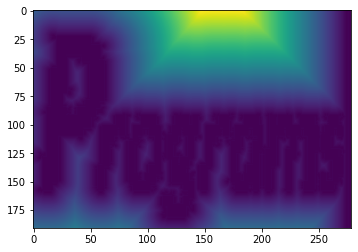

In [10]:
ima = imread('http://homepages.ulb.ac.be/~odebeir/data/programs.png')[:,:,0]
X = np.logical_not(ima)

dist_X = distance_transform_edt(X)

plt.imshow(dist_X)

Also a way to have the thickness of an image 

## Ultimate Eroded Point (UEP) 

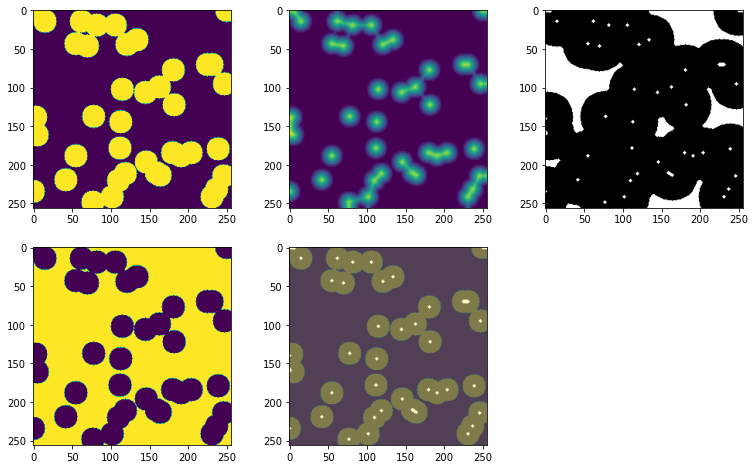

In [11]:
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from scipy import ndimage as ndi

np.random.seed(1)
n = (np.random.random((256,256))<.0005).astype(np.uint8)
d = skr.maximum(n,disk(15))

distance = ndi.distance_transform_edt(d).astype(np.uint8)
local_max = (distance == skr.maximum(distance,disk(20))).astype(np.uint8)
background = distance == 0
c_local_max = local_max.copy()
c_local_max[background] = 0


plt.figure(figsize=[13,8])
plt.subplot(2,3,1)
plt.imshow(d)
plt.subplot(2,3,2)
plt.imshow(distance)
plt.subplot(2,3,3)
plt.imshow(skr.maximum(local_max,disk(2)),cmap=plt.cm.gray)
plt.subplot(2,3,4)
plt.imshow(background)
plt.subplot(2,3,5)
plt.imshow(d,alpha=.5)
plt.imshow(skr.maximum(c_local_max,disk(2)),cmap=plt.cm.gray,alpha=.5);

>see also:
* Ultimate Eroded Point **IPH**

## Object labeling

The object labeling consist in assigning a unique integer value to each connected component of a binary image.

Basically, we fix a structuring element and we go through the image, row by row, pixel by pixel. We put the structuring element on top and as soon as there is no labelled pixel in the neighborhood of the pixel (which is defined by the structuring element), we create a new label.

Ultimately, one can have collision, where two neighboring pixels of a pixel are labelled differently. In this case, one creates an alias which links the two labels, and at the end, replaces one with the other to have one label.

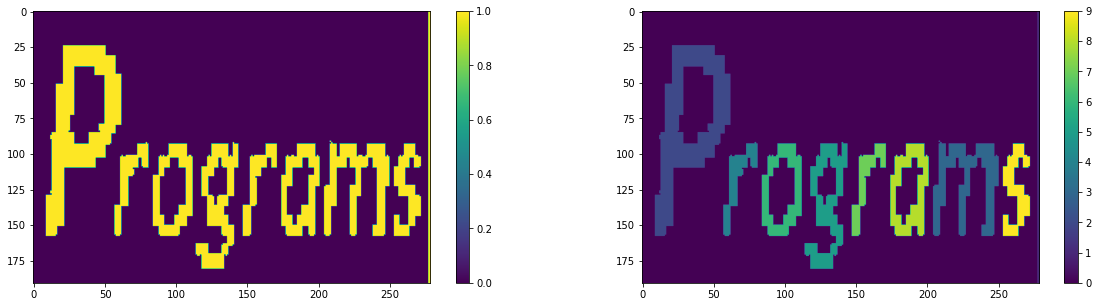

In [12]:
from skimage.measure import label

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/programs.png')[:,:,0] >10

lab = label(ima,background=0)
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
plt.imshow(ima.astype(np.uint8))
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(lab)
plt.colorbar();

## Hole filling

## Alternate Sequential Filter
Idea: do opening and closing with particular structuring element having increasing in the radius.

Op and clos are idempotent : if the size of the radius is fixed, applying multiple times the operation doesn't change anything. When we are increasing the radius, we are actually smoothing the image.

## Morphological texture analysis 

>see also:
* Morphological texture analysis **DIPM** pp43-102